<a href="https://colab.research.google.com/github/hkna00000/Graduate-Predict/blob/main/CS313.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint


Mounted at /content/drive


#SINHVIEN + TOTNGHIEP
1. mssv
2. gioitinh
3. noisinh
4. lopsh
5. khoa
6. hedt
7. khoahoc
8. chuyennganh2
9. xeploai

In [ ]:
#load data
totnghiep =  pd.read_csv('/content/drive/MyDrive/Education dataset/14.totnghiep.csv', encoding= 'utf-8')
sinhvien = pd.read_csv('/content/drive/MyDrive/Education dataset/01.sinhvien.csv', encoding= 'utf-8')
xulyhv = pd.read_csv('/content/drive/MyDrive/Education dataset/08.XLHV.csv', encoding= 'utf-8')
chungchi =  pd.read_csv('/content/drive/MyDrive/Education dataset/03.sinhvien_chungchi.csv', encoding= 'utf-8')
thisinh = pd.read_csv('/content/drive/MyDrive/Education dataset/05.ThiSinh.csv', encoding= 'utf-8')

print('--------------------SINHVIEN + TOTNGHIEP-------------------------')
#mapping sinhvien + totnghiep
data = sinhvien.merge(totnghiep, how='left', on='mssv')[['mssv',' gioitinh',' noisinh',' lopsh', ' khoa', ' hedt',' khoahoc',' chuyennganh2',' xeploai']]
data.info()

#check and drop missing data
print('check missing data: \n', data.isna().sum())
data.dropna(how="all", inplace=True)
print('\nafter dropping nan: \n', data.isna().sum())

#check duplicated
print('check duplicated data: ', data.duplicated().sum())
data.drop_duplicates(inplace=True)

print('Data sinhvien + totnghiep:', data.shape)
data

--------------------SINHVIEN + TOTNGHIEP-------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8336
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mssv           8295 non-null   object 
 1    gioitinh      8295 non-null   float64
 2    noisinh       8295 non-null   object 
 3    lopsh         8295 non-null   object 
 4    khoa          8295 non-null   object 
 5    hedt          8295 non-null   object 
 6    khoahoc       8295 non-null   float64
 7    chuyennganh2  8295 non-null   object 
 8    xeploai       1845 non-null   object 
dtypes: float64(2), object(7)
memory usage: 651.3+ KB
check missing data: 
 mssv               42
 gioitinh          42
 noisinh           42
 lopsh             42
 khoa              42
 hedt              42
 khoahoc           42
 chuyennganh2      42
 xeploai         6492
dtype: int64

after dropping nan: 
 mssv                0
 gioitinh   

,mssv,gioitinh,noisinh,lopsh,khoa,hedt,khoahoc,chuyennganh2,xeploai
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,TP. Hồ Chí Minh,KTPM0001,CNPM,CQUI,8.0,D480103,Khá
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1.0,Đồng Tháp,HTTT0001,HTTT,CTTT,8.0,D480104,Khá
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,Hà Nam Ninh,KHMT2013,KHMT,CQUI,8.0,D480101,NaN
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1.0,TP. Hồ Chí Minh,HTTT0001,HTTT,CTTT,8.0,D480104,Khá
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1.0,Thành phố Hồ Chí Minh,MMTT0001,MMT&TT,CQUI,8.0,D480201,NaN
...,...,...,...,...,...,...,...,...,...
8332,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,1.0,'An Giang',MMCL2019.2,MMT&TT,CLC,14.0,7480102,NaN
8333,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,1.0,'Bình Thuận',KHMT2019,KHMT,CQUI,14.0,D480101,NaN
8334,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,1.0,'Lâm Đồng',KHMT2019,KHMT,CQUI,14.0,D480101,NaN
8335,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,1.0,'Bến Tre',CNTT2019,KTTT,CQUI,14.0,D480201,NaN


NaN                6450
 Khá               1125
 Giỏi               447
 Trung bình khá     266
 Xuất sắc             7
Name:  xeploai, dtype: int64


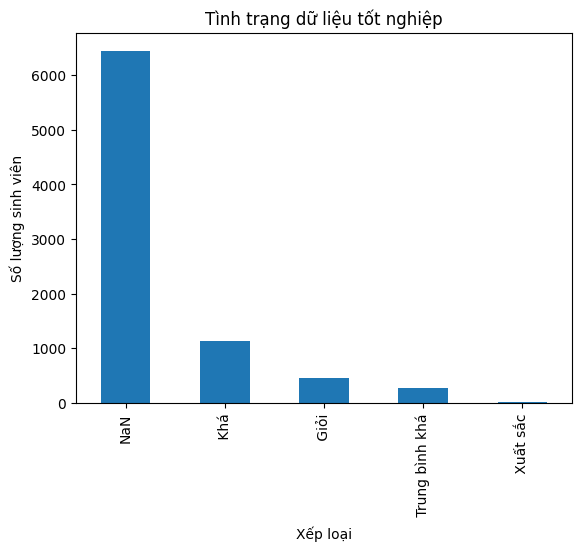

In [ ]:
check = data.copy()
check[' xeploai'].replace([' Trung bình Khá',' TB Khá', ' TB khá'], ' Trung bình khá', inplace=True)
check[' xeploai'] = check.apply(lambda row: 'NaN' if (row[' xeploai'] is np.nan) else row[' xeploai'],axis=1)

count = check[' xeploai'].value_counts()
print(count)
# Vẽ biểu đồ cột
count.plot(kind='bar')

# Đặt tiêu đề cho biểu đồ
plt.title('Tình trạng dữ liệu tốt nghiệp')

# Đặt tên cho trục x
plt.xlabel('Xếp loại')

# Đặt tên cho trục y
plt.ylabel('Số lượng sinh viên')

# Hiển thị biểu đồ
plt.show()

In [ ]:
#lopsh
print('Số lượng thuộc tính trong cột lopsh là: ', len(data[' lopsh'].unique()))
print('Các thuộc tính và số lượng là:')
ko=data[' lopsh'].value_counts()
ko

Số lượng thuộc tính trong cột lopsh là:  159
Các thuộc tính và số lượng là:


 KTPM0001      541
 HTTT0001      497
 MMTT0001      476
 KTMT0001      344
 KHMT0001      291
              ... 
 CTTT2016        6
 HTCL2014        5
 PMCL2014        3
 KHCl2019.3      1
 TMCL2020        1
Name:  lopsh, Length: 159, dtype: int64

1.0    7232
0.0    1063
Name:  gioitinh, dtype: int64


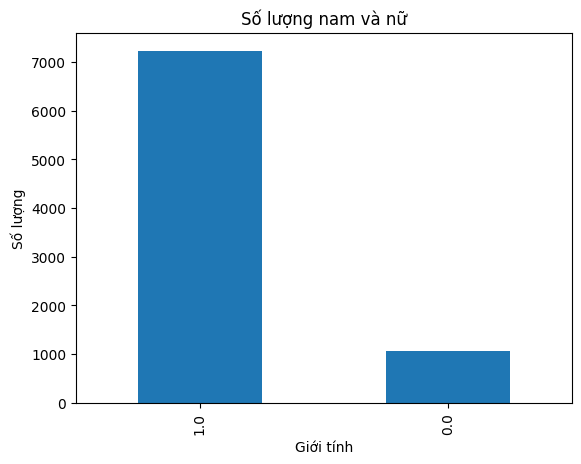

In [ ]:
#gioitinh
gioitinh_count = data[' gioitinh'].value_counts()
print(gioitinh_count)
# Vẽ biểu đồ cột
gioitinh_count.plot(kind='bar')

# Đặt tiêu đề cho biểu đồ
plt.title('Số lượng nam và nữ')

# Đặt tên cho trục x
plt.xlabel('Giới tính')

# Đặt tên cho trục y
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.show()

In [ ]:
#noisinh
print(data[' noisinh'].isna().sum())
print('check unique value of noisinh: ', len(data[' noisinh'].unique()))
data[' noisinh'].unique()
data[' noisinh'].replace([' TP. Hồ Chí Minh',' Thành phố Hồ Chí Minh',' Tp Hồ Chí Minh'," 'TP. Hồ Chí Minh'"," 'Thành phố Hồ Chí Minh'"," 'Tp Hồ Chí Minh'"," 'Hồ Chí Minh City'"," 'Tp.Hồ Chí Minh'"," 'Tp. Hồ Chí Minh'"," 'TP.HỒ CHÍ MINH'"," 'Thành Phố Hồ Chí Minh'"," 'Thành phố Hồ Chí Minh'"," 'Tp.Hồ Chí Minh'"," 'TP Hồ Chí Minh'"," 'TP.Hồ Chí Minh'"," 'Hồ Chí Minh'"," 'thành phố hồ chí minh'"," 'thành phố Hồ Chí Minh'"," 'Quận Thủ Đức'"," 'TP. HỒ CHÍ MINH'",' NULL'," ''" ], ' TP. Hồ Chí Minh', inplace=True)
data[' noisinh'].replace([' Đồng Tháp'," 'Đồng Tháp'"," 'Đồng Tháp'"," 'Đồng Tháp '"," 'Đồng tháp'" ], ' Tỉnh Đồng Tháp', inplace=True)
data[' noisinh'].replace([' Hà Nam Ninh'," 'Hà Nam Ninh'" ], ' Tỉnh Hà Nam Ninh', inplace=True)
data[' noisinh'].replace([' Hà Tĩnh'," 'Hà Tĩnh'"," 'Hà Tĩnh'"," 'Hà Tĩnh '"," 'Hà tĩnh'"," 'hà tĩnh '" ], ' Tỉnh Hà Tĩnh', inplace=True)
data[' noisinh'].replace([' Thanh Hóa',' Thanh Hoá'," 'Thanh Hoá'"," 'Thanh Hóa'"," 'Tỉnh Thanh Hóa'" ], ' Tỉnh Thanh Hóa', inplace=True)
data[' noisinh'].replace([' Quảng Ngãi'," 'Quảng Ngãi'"," 'Quãng Ngãi'"," 'Quảng Ngãi'" ], ' Tỉnh Quảng Ngãi', inplace=True)
data[' noisinh'].replace([' Khánh Hoà',' Khánh Hòa'," 'Khánh Hoà'"," 'Khánh Hòa'"," 'Tỉnh Khánh Hòa'"," 'Khánh Hòa'"," 'Tp. Nha Trang'" ], ' Tỉnh Khánh Hòa', inplace=True)
data[' noisinh'].replace([' Cần Thơ',' Thành phố Cần Thơ'," 'Cần Thơ'"," 'Thành phố Cần Thơ'"," 'Tp.Cần Thơ'" ], ' TP. Cần Thơ', inplace=True)
data[' noisinh'].replace([' Gia Lai'," 'Gia Lai'"," 'Gia lai'" ], ' Tỉnh Gia Lai', inplace=True)
data[' noisinh'].replace([' Tiền Giang'," 'Tiền Giang'"," 'Tiền giang'", " 'Tiền Giang '"," 'Tiền Giang'" ], ' Tỉnh Tiền Giang', inplace=True)
data[' noisinh'].replace([' Vĩnh Long'," 'Vĩnh Long'"," 'Vĩnh Long'"," 'LONG HỒ'" ], ' Tỉnh Vĩnh Long', inplace=True)
data[' noisinh'].replace([' Sông Bé'," 'Sông Bé'" ], ' Tỉnh Sông Bé', inplace=True)
data[' noisinh'].replace([' Kiên Giang'," 'Kiên Giang'" ], ' Tỉnh Kiên Giang', inplace=True)
data[' noisinh'].replace([' Lâm Đồng'," 'Lâm Đồng'"," 'Lâm Đồng'"," 'Đà Lạt'" ], ' Tỉnh Lâm Đồng', inplace=True)
data[' noisinh'].replace([' Hải Dương'," 'Hải Dương'" ], ' Tỉnh Hải Dương', inplace=True)
data[' noisinh'].replace([' Trà Vinh'," 'Trà Vinh'"," 'Trà vinh'" ], ' Tỉnh Trà Vinh', inplace=True)
data[' noisinh'].replace([' Nam Định'," 'Nam Định'"," 'nam định'"," 'Nam Định'"," 'Nghĩa Sơn - Nghĩa Hưng - Nam Định'" ], ' Tỉnh Nam Định', inplace=True)
data[' noisinh'].replace([' Quảng Nam'," 'Quảng Nam'"," 'Quảng Nam'"," 'Quảng Nam '" ], ' Tỉnh Quảng Nam', inplace=True)
data[' noisinh'].replace([' Bình Thuận'," 'Bình Thuận'"," 'Bình Thuận '"," 'Bình Thuận'"," 'bình thuận'" ], ' Tỉnh Bình Thuận', inplace=True)
data[' noisinh'].replace([' Quảng Bình'," 'Quảng Bình'"," 'Quảng BÌnh'" ], ' Tỉnh Quảng Bình', inplace=True)
data[' noisinh'].replace([' Bến Tre'," 'Bến Tre'"," 'Bến Tre'" ], ' Tỉnh Bến Tre', inplace=True)
data[' noisinh'].replace([' Ninh Thuận'," 'Ninh Thuận'"," 'Tỉnh Ninh Thuận'"," 'Ninh Thuận '" ], ' Tỉnh Ninh Thuận', inplace=True)
data[' noisinh'].replace([' Bình Định'," 'Bình Định'"," 'Bình Định'"," 'Bình Định '"," 'Bình ĐỊnh'" ], ' Tỉnh Bình Định', inplace=True)
data[' noisinh'].replace([' An Giang'," 'An Giang'"," 'An giang'" ], ' Tỉnh An Giang', inplace=True)
data[' noisinh'].replace([' Bà Rịa - Vũng Tàu'," 'Bà Rịa - Vũng Tàu'"," 'Bà Rịa Vũng Tàu'"," 'Bà Rịa-Vũng Tàu'"," 'Tp. Vũng Tàu'"," 'Vũng Tàu'" ], ' Tỉnh Bà Rịa - Vũng Tàu', inplace=True)
data[' noisinh'].replace([' Thừa Thiên Huế'," 'Thừa Thiên Huế'" ], ' Tỉnh Thừa Thiên Huế', inplace=True)
data[' noisinh'].replace([' Kon Tum'," 'Kon Tum'"," 'KonTum'"," 'Kontum'" ], ' Tỉnh Kon Tum', inplace=True)
data[' noisinh'].replace([' Tây Ninh'," 'Tây Ninh'"," 'Tỉnh Tây Ninh'" ], ' Tỉnh Tây Ninh', inplace=True)
data[' noisinh'].replace([' Hà Nội'," 'Hà Nội'"," 'Thành phố Hà Nội'"," 'TP.Hà Nội'",' Hà Tây'," 'Hà Tây'" ], ' TP. Hà Nội', inplace=True)
data[' noisinh'].replace([' Đồng Nai',' Tỉnh Đồng Nai'," 'Đồng Nai'"," 'Tỉnh Đồng Nai'"," 'đồng nai'"," 'Đồng Nai'" ], ' Tỉnh Đồng Nai', inplace=True)
data[' noisinh'].replace([' Nghệ An'," 'Nghệ An'"," 'Nghệ an'"," 'Nghệ an'"," 'Nghệ An'"," 'Nghệ An '"," 'Tỉnh Nghệ An'" ], ' Tỉnh Nghệ An', inplace=True)
data[' noisinh'].replace([' Phú Yên'," 'Phú Yên'"," 'phú yên'"," 'Phú Yên '"," 'Phú yên'"," 'Phú Yên'" ], ' Tỉnh Phú Yên', inplace=True)
data[' noisinh'].replace([' Đăk Lăk',' Đắk Lắk'," 'Đăk Lăk'"," 'Đắk Lắk'"," 'Đăk lăk'"," 'Tỉnh Đăklăk'"," 'ĐăkLăk'"," 'TP. Buôn Ma Thuột'" ], ' Tỉnh Đăk Lăk', inplace=True)
data[' noisinh'].replace([' Đắc Nông',' Đắk Nông'," 'Đắk Nông'"," 'Đắc Nông'"," 'Đăk Nông'" ], ' Tỉnh Đăk Nông', inplace=True)
data[' noisinh'].replace([' Bình Dương',' Tỉnh Bình Dương'," 'Bình Dương'"," 'Bình Dương'" ], ' Tỉnh Bình Dương', inplace=True)
data[' noisinh'].replace([' Long An'," 'Long An'" ], ' Tỉnh Long An', inplace=True)
data[' noisinh'].replace([' Thái Bình'," 'Thái Bình'"," 'Thái Bình'" ], ' Tỉnh Thái Bình', inplace=True)
data[' noisinh'].replace([' Bình Phước'," 'Bình Phước'"," 'Bình Phước '"," 'Bình phước '"," 'Bình phước'" ], ' Tỉnh Bình Phước', inplace=True)
data[' noisinh'].replace([' Hà Sơn Bình' ], ' Tỉnh Hà Sơn Bình', inplace=True)
data[' noisinh'].replace([' Đà Nẵng',' Thành phố Đà Nẵng'," 'Đà Nẵng'"," 'Thành phố Đà Nẵng'" ], ' TP. Đà Nẵng', inplace=True)
data[' noisinh'].replace([' Ninh Bình'," 'Ninh Bình'" ], ' Tỉnh Ninh Bình', inplace=True)
data[' noisinh'].replace([' Cà Mau'," 'Cà Mau'" ], ' Tỉnh Cà Mau', inplace=True)
data[' noisinh'].replace([' Quảng Trị'," 'Quảng Trị'"," 'Quảng Trị'"," 'Quảng Trị '" ], ' Tỉnh Quảng Trị', inplace=True)
data[' noisinh'].replace([' Hải Hưng' ], ' Tỉnh Hải Hưng', inplace=True)
data[' noisinh'].replace([' Hưng Yên'," 'Hưng Yên'" ], ' Tỉnh Hưng Yên', inplace=True)
data[' noisinh'].replace([' Bắc Giang'," 'Bắc Giang'" ], ' Tỉnh Bắc Giang', inplace=True)
data[' noisinh'].replace([' Hải Phòng'," 'Hải Phòng'"," 'Thành phố Hải Phòng'"," 'Tp.Hải Phòng'" ], ' TP. Hải Phòng', inplace=True)
data[' noisinh'].replace([' Minh Hải' ], ' Tỉnh Minh Hải', inplace=True)
data[' noisinh'].replace([' Sóc Trăng'," 'Sóc Trăng'"," 'Sóc Trăng'"," 'Sóc Trăng '" ], ' Tỉnh Sóc Trăng', inplace=True)
data[' noisinh'].replace([' Hậu Giang'," 'Hậu Giang'" ], ' Tỉnh Hậu Giang', inplace=True)
data[' noisinh'].replace([" 'Bắc Cạn'" ], ' Tỉnh Bắc Kạn', inplace=True)
data[' noisinh'].replace([" 'Vĩnh Phúc'" ], ' Tỉnh Vĩnh Phúc', inplace=True)
data[' noisinh'].replace([" 'Bạc Liêu'"," 'Bạc Liêu'"," 'Bạc liêu'" ], ' Tỉnh Bạc Liêu', inplace=True)
data[' noisinh'].replace([" 'Campuchia'" ], ' Campuchia', inplace=True)
data[' noisinh'].replace([" 'Bắc Ninh'" ], ' Tỉnh Bắc Ninh', inplace=True)
data[' noisinh'].replace([" 'Liên Bang Nga'" ], ' Liên Bang Nga', inplace=True)
data[' noisinh'].replace([" 'Quảng Ninh'" ], ' Tỉnh Quảng Ninh', inplace=True)
data[' noisinh'].replace([" 'Phú Thọ'" ], ' Tỉnh Phú Thọ', inplace=True)
data[' noisinh'].replace([" 'Lạng Sơn'" ], ' Tỉnh Lạng Sơn', inplace=True)
data[' noisinh'].replace([" 'Cộng hoà Séc'" ], ' Cộng Hòa Séc', inplace=True)
data[' noisinh'].replace([" 'Yên Bái'" ], ' Tỉnh Yên Bái', inplace=True)
data[' noisinh'].replace([" 'Cao Bằng'" ], ' Tỉnh Cao Bằng', inplace=True)
data[' noisinh'].replace([" 'Australia'"], ' Australia', inplace=True)
data[' noisinh'].replace([" 'Hòa Bình'"], ' Tỉnh Hòa Bình', inplace=True)
data[' noisinh'].replace([" 'Lai Châu'"], ' Tỉnh Lai Châu', inplace=True)
data[' noisinh'].replace([" 'Tuyên Quang'"], ' Tỉnh Tuyên Quang', inplace=True)
data[' noisinh'].replace([" 'Thái Nguyên'"], ' Tỉnh Thái Nguyên', inplace=True)
data[' noisinh'].replace([' Hà Nam'," 'Hà Nam'"," 'Hà Nam '"], 'Tỉnh Hà Nam', inplace=True)


print("\nGia tri unique cua noisinh sau khi dieu chinh khong nhat quan:\n", data[' noisinh'].unique())
#noisinh
noisinh_count= data.groupby(' noisinh').size().reset_index(name='count')
noisinh_count= noisinh_count.sort_values(by='count', ascending=False)
print(noisinh_count)

0
check unique value of noisinh:  231

Gia tri unique cua noisinh sau khi dieu chinh khong nhat quan:
 [' TP. Hồ Chí Minh' ' Tỉnh Đồng Tháp' ' Tỉnh Hà Nam Ninh' ' Tỉnh Hà Tĩnh'
 ' Tỉnh Thanh Hóa' ' Tỉnh Quảng Ngãi' ' Tỉnh Khánh Hòa' ' TP. Cần Thơ'
 ' Tỉnh Gia Lai' ' Tỉnh Tiền Giang' ' Tỉnh Vĩnh Long' ' Tỉnh Sông Bé'
 ' Tỉnh Kiên Giang' ' Tỉnh Lâm Đồng' ' Tỉnh Hải Dương' ' Tỉnh Trà Vinh'
 ' Tỉnh Nam Định' ' Tỉnh Quảng Nam' ' Tỉnh Bình Thuận' ' Tỉnh Quảng Bình'
 ' Tỉnh Bến Tre' ' Tỉnh Ninh Thuận' ' Tỉnh Bình Định' ' Tỉnh An Giang'
 ' Tỉnh Bà Rịa - Vũng Tàu' ' Tỉnh Thừa Thiên Huế' ' Tỉnh Kon Tum'
 ' Tỉnh Tây Ninh' ' TP. Hà Nội' ' Tỉnh Đồng Nai' ' Tỉnh Nghệ An'
 ' Tỉnh Phú Yên' ' Tỉnh Đăk Lăk' ' Tỉnh Đăk Nông' ' Tỉnh Bình Dương'
 ' Tỉnh Long An' ' Tỉnh Thái Bình' ' Tỉnh Bình Phước' ' Tỉnh Hà Sơn Bình'
 ' TP. Đà Nẵng' ' Tỉnh Ninh Bình' ' Tỉnh Cà Mau' ' Tỉnh Quảng Trị'
 ' Tỉnh Hải Hưng' ' Tỉnh Hưng Yên' ' Tỉnh Bắc Giang' ' TP. Hải Phòng'
 ' Tỉnh Minh Hải' ' Tỉnh Sóc Trăng' 'Tỉnh Hà Nam' ' Tỉ

check unique value of chuyennganh2:  12
[' D480103' ' D480104' ' D480101' ' D480201' ' D52480104' ' D480102'
 ' D520214' ' D480299' '7480102' ' 7480201_KHDL' ' 7480201_CLCN' '7480109']
 chuyennganh2
 D480103         1467
 D480101         1259
 D480104         1256
 D520214         1037
 D480299          820
 D480201          721
 D480102          639
 D52480104        456
7480102           317
 7480201_CLCN     205
7480109            63
 7480201_KHDL      55
dtype: int64


Text(0, 0.5, 'Số lượng sinh viên')

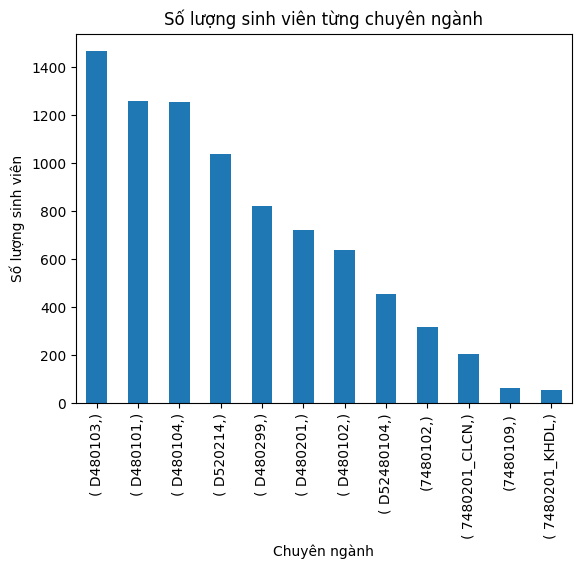

In [ ]:
#chuyennganh2
print('check unique value of chuyennganh2: ', len(data[' chuyennganh2'].unique()))
print(data[' chuyennganh2'].unique())

#gioitinh
chuyennganh2_count= data[[' chuyennganh2']].value_counts()
print(chuyennganh2_count)
chuyennganh2_count.plot(kind='bar')

# Đặt tiêu đề cho biểu đồ
plt.title('Số lượng sinh viên từng chuyên ngành')

# Đặt tên cho trục x
plt.xlabel('Chuyên ngành')

# Đặt tên cho trục y
plt.ylabel('Số lượng sinh viên')

# SINHVIEN + TOTNGHIEP + XULYHOCVU
1. mssv
2. gioitinh
3. noisinh
4. lopsh
5. khoa
6. hedt
7. khoahoc
8. chuyennganh2
9. tinhtrang_hocvu
10. class

In [ ]:
print('\n\n--------------------SINHVIEN + TOTNGHIEP + XULYHOCVU-------------------------')
#mapping sinhvien + totnghiep + xulyhv
xulyhv = xulyhv.drop_duplicates(subset='mssv', keep="last")
data = data.merge(xulyhv, how='left', on='mssv')[['mssv',' gioitinh',' noisinh',' lopsh', ' khoa', ' hedt',' khoahoc',' chuyennganh2',' tinhtrang', ' xeploai']]
data.rename(columns = {' tinhtrang':'tinhtrang_hocvu', ' xeploai':'class'}, inplace = True)
print('Data sinhvien + totnghiep + xulyhv:', data.shape)

#các sinh viên không bị xử lý học vụ: tinhtrang_hocvu == 0
data['tinhtrang_hocvu'] = data['tinhtrang_hocvu'].fillna(0)

#check and drop duplicated
print('check duplicated data:', data.duplicated().sum())

#check missing data
print('check missing data: \n', data.isna().sum())
data



--------------------SINHVIEN + TOTNGHIEP + XULYHOCVU-------------------------
Data sinhvien + totnghiep + xulyhv: (8295, 10)
check duplicated data: 0
check missing data: 
 mssv                  0
 gioitinh             0
 noisinh              0
 lopsh                0
 khoa                 0
 hedt                 0
 khoahoc              0
 chuyennganh2         0
tinhtrang_hocvu       0
class              6450
dtype: int64


,mssv,gioitinh,noisinh,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang_hocvu,class
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,TP. Hồ Chí Minh,KTPM0001,CNPM,CQUI,8.0,D480103,0.0,Khá
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1.0,Tỉnh Đồng Tháp,HTTT0001,HTTT,CTTT,8.0,D480104,8.0,Khá
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,Tỉnh Hà Nam Ninh,KHMT2013,KHMT,CQUI,8.0,D480101,5.0,NaN
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1.0,TP. Hồ Chí Minh,HTTT0001,HTTT,CTTT,8.0,D480104,0.0,Khá
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1.0,TP. Hồ Chí Minh,MMTT0001,MMT&TT,CQUI,8.0,D480201,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...
8290,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,1.0,Tỉnh An Giang,MMCL2019.2,MMT&TT,CLC,14.0,7480102,2.0,NaN
8291,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,1.0,Tỉnh Bình Thuận,KHMT2019,KHMT,CQUI,14.0,D480101,0.0,NaN
8292,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,1.0,Tỉnh Lâm Đồng,KHMT2019,KHMT,CQUI,14.0,D480101,0.0,NaN
8293,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,1.0,Tỉnh Bến Tre,CNTT2019,KTTT,CQUI,14.0,D480201,0.0,NaN


# SINHVIEN + TOTNGHIEP + XULYHOCVU + THISINH
1. mssv
2. gioitinh
3. noisinh
4. dien_tt
5. lopsh
6. khoa
7. hedt
8. khoahoc
9. chuyennganh2
10. tinhtrang_hocvu
11. class

In [ ]:
print('\n\n--------------------SINHVIEN + TOTNGHIEP + XULYHOCVU + THISINH-------------------------')
#mapping
data = data.merge(thisinh, how='left', on='mssv')[['mssv',' gioitinh',' noisinh','dien_tt',' lopsh', ' khoa', ' hedt',' khoahoc',' chuyennganh2','tinhtrang_hocvu', 'class']]

#check duplicated
print('check duplicated data: \n', data.duplicated().sum())

#check missing data
data['dien_tt'] = data.apply(lambda row: 'Không xác định' if (row['dien_tt'] is np.nan) else row['dien_tt'],axis=1)
print('check missing data: \n', data.isna().sum())
print('Số lượng thuộc tính trong cột dien_tt là:')
print(data['dien_tt'].unique())
print('Ta thay thế các giá trị "Không xác định" bằng giá trị có số lượng nhiều nhất là "THPT": ')
data.replace(to_replace='Không xác định',value='THPT',inplace=True)
print('Data sinhvien + totnghiep + xulyhv + chungchi + thisinh:', data.shape)
data



--------------------SINHVIEN + TOTNGHIEP + XULYHOCVU + THISINH-------------------------
check duplicated data: 
 0
check missing data: 
 mssv                  0
 gioitinh             0
 noisinh              0
dien_tt               0
 lopsh                0
 khoa                 0
 hedt                 0
 khoahoc              0
 chuyennganh2         0
tinhtrang_hocvu       0
class              6450
dtype: int64
Số lượng thuộc tính trong cột dien_tt là:
['THPT' 'Không xác định' 'TT-Bộ' 'CUTUYEN' 'ƯT-Bộ' '30A' 'ƯT-ĐHQG' 'ĐGNL'
 'CCQT']
Ta thay thế các giá trị "Không xác định" bằng giá trị có số lượng nhiều nhất là "THPT": 
Data sinhvien + totnghiep + xulyhv + chungchi + thisinh: (8295, 11)


,mssv,gioitinh,noisinh,dien_tt,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang_hocvu,class
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,TP. Hồ Chí Minh,THPT,KTPM0001,CNPM,CQUI,8.0,D480103,0.0,Khá
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1.0,Tỉnh Đồng Tháp,THPT,HTTT0001,HTTT,CTTT,8.0,D480104,8.0,Khá
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,Tỉnh Hà Nam Ninh,THPT,KHMT2013,KHMT,CQUI,8.0,D480101,5.0,NaN
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1.0,TP. Hồ Chí Minh,THPT,HTTT0001,HTTT,CTTT,8.0,D480104,0.0,Khá
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1.0,TP. Hồ Chí Minh,THPT,MMTT0001,MMT&TT,CQUI,8.0,D480201,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8290,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,1.0,Tỉnh An Giang,THPT,MMCL2019.2,MMT&TT,CLC,14.0,7480102,2.0,NaN
8291,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,1.0,Tỉnh Bình Thuận,THPT,KHMT2019,KHMT,CQUI,14.0,D480101,0.0,NaN
8292,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,1.0,Tỉnh Lâm Đồng,THPT,KHMT2019,KHMT,CQUI,14.0,D480101,0.0,NaN
8293,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,1.0,Tỉnh Bến Tre,THPT,CNTT2019,KTTT,CQUI,14.0,D480201,0.0,NaN


# SINHVIEN + TOTNGHIEP + XULYHOCVU + THISINH + CHUNGCHI
1. mssv
2. gioitinh
3. noisinh
4. dien_tt
5. lopsh
6. khoa
7. hedt
8. khoahoc
9. chuyennganh2
10. tinhtrang_hocvu
11. tinhtrang_chungchiav
12. class

In [ ]:
print('\n\n--------------------SINHVIEN + TOTNGHIEP + XULYHOCVU + THISINH + CHUNGCHI-------------------------')
#mapping sinhvien + totnghiep + xulyhv + chungchi
chungchi = chungchi.drop_duplicates(subset = 'mssv', keep="last")
print('check duplicated data chungchi:', chungchi.duplicated().sum())
data = data.merge(chungchi, how='left', on='mssv')[['mssv',' gioitinh',' noisinh','dien_tt',' lopsh', ' khoa', ' hedt',' khoahoc',' chuyennganh2','tinhtrang_hocvu', ' url','class']]
data.rename(columns = {' url': 'tinhtrang_chungchiav'}, inplace = True)
data['tinhtrang_chungchiav'] = data.apply(lambda row: 0 if (row['tinhtrang_chungchiav'] is np.nan) else 1,axis=1)
#check and drop duplicated
print('check duplicated data:', data.duplicated().sum())

#check missing data
print('check missing data: \n', data.isna().sum())
print('Data sinhvien + totnghiep + xulyhv + thisinh + chungchi:', data.shape)
data



--------------------SINHVIEN + TOTNGHIEP + XULYHOCVU + THISINH + CHUNGCHI-------------------------
check duplicated data chungchi: 0
check duplicated data: 0
check missing data: 
 mssv                       0
 gioitinh                  0
 noisinh                   0
dien_tt                    0
 lopsh                     0
 khoa                      0
 hedt                      0
 khoahoc                   0
 chuyennganh2              0
tinhtrang_hocvu            0
tinhtrang_chungchiav       0
class                   6450
dtype: int64
Data sinhvien + totnghiep + xulyhv + thisinh + chungchi: (8295, 12)


,mssv,gioitinh,noisinh,dien_tt,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang_hocvu,tinhtrang_chungchiav,class
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,TP. Hồ Chí Minh,THPT,KTPM0001,CNPM,CQUI,8.0,D480103,0.0,0,Khá
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1.0,Tỉnh Đồng Tháp,THPT,HTTT0001,HTTT,CTTT,8.0,D480104,8.0,0,Khá
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,Tỉnh Hà Nam Ninh,THPT,KHMT2013,KHMT,CQUI,8.0,D480101,5.0,0,NaN
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1.0,TP. Hồ Chí Minh,THPT,HTTT0001,HTTT,CTTT,8.0,D480104,0.0,1,Khá
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1.0,TP. Hồ Chí Minh,THPT,MMTT0001,MMT&TT,CQUI,8.0,D480201,8.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8290,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,1.0,Tỉnh An Giang,THPT,MMCL2019.2,MMT&TT,CLC,14.0,7480102,2.0,0,NaN
8291,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,1.0,Tỉnh Bình Thuận,THPT,KHMT2019,KHMT,CQUI,14.0,D480101,0.0,0,NaN
8292,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,1.0,Tỉnh Lâm Đồng,THPT,KHMT2019,KHMT,CQUI,14.0,D480101,0.0,0,NaN
8293,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,1.0,Tỉnh Bến Tre,THPT,CNTT2019,KTTT,CQUI,14.0,D480201,0.0,0,NaN


tinhtrang_chungchiav
0                       6799
1                       1496
dtype: int64


Text(0, 0.5, 'Số lượng sinh viên')

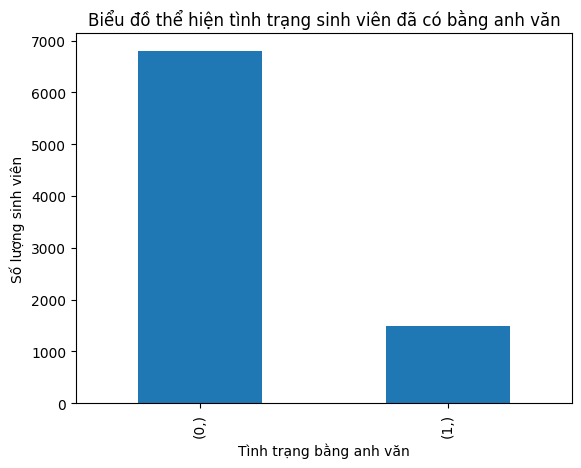

In [ ]:
tinhtrang_chungchiav_count= data[['tinhtrang_chungchiav']].value_counts()
print(tinhtrang_chungchiav_count)

tinhtrang_chungchiav_count.plot(kind='bar')

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ thể hiện tình trạng sinh viên đã có bằng anh văn')

# Đặt tên cho trục x
plt.xlabel('Tình trạng bằng anh văn')

# Đặt tên cho trục y
plt.ylabel('Số lượng sinh viên')

In [ ]:
#check = data
#check['class'].replace([' Trung bình Khá',' TB Khá', ' TB khá'], ' Trung bình khá', inplace=True)
#check['class'] = check.apply(lambda row: 'NaN' if (row['class'] is np.nan) else row['class'],axis=1)
#sns.catplot(x='class',hue='tinhtrang_chungchiav',data=check,kind="count")

In [ ]:
data['tinhtrang_chungchiav'] = data.apply(lambda row: 1 if (row['class'] is not np.nan) else row['tinhtrang_chungchiav'],axis=1)
data

,mssv,gioitinh,noisinh,dien_tt,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang_hocvu,tinhtrang_chungchiav,class
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,TP. Hồ Chí Minh,THPT,KTPM0001,CNPM,CQUI,8.0,D480103,0.0,1,Khá
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1.0,Tỉnh Đồng Tháp,THPT,HTTT0001,HTTT,CTTT,8.0,D480104,8.0,1,Khá
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,Tỉnh Hà Nam Ninh,THPT,KHMT2013,KHMT,CQUI,8.0,D480101,5.0,0,NaN
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1.0,TP. Hồ Chí Minh,THPT,HTTT0001,HTTT,CTTT,8.0,D480104,0.0,1,Khá
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1.0,TP. Hồ Chí Minh,THPT,MMTT0001,MMT&TT,CQUI,8.0,D480201,8.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8290,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,1.0,Tỉnh An Giang,THPT,MMCL2019.2,MMT&TT,CLC,14.0,7480102,2.0,0,NaN
8291,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,1.0,Tỉnh Bình Thuận,THPT,KHMT2019,KHMT,CQUI,14.0,D480101,0.0,0,NaN
8292,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,1.0,Tỉnh Lâm Đồng,THPT,KHMT2019,KHMT,CQUI,14.0,D480101,0.0,0,NaN
8293,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,1.0,Tỉnh Bến Tre,THPT,CNTT2019,KTTT,CQUI,14.0,D480201,0.0,0,NaN


In [ ]:
#check = data
#check['class'].replace([' Trung bình Khá',' TB Khá', ' TB khá'], ' Trung bình khá', inplace=True)
#check['class'] = check.apply(lambda row: 'NaN' if (row['class'] is np.nan) else row['class'],axis=1)
#print(sns.catplot(x='class',hue='tinhtrang_chungchiav',data=check,kind="count"))

# SINHVIEN + TOTNGHIEP + XULYHOCVU + THISINH + CHUNGCHI + DIEMRL
1. mssv
2. gioitinh
3. noisinh
4. dien_tt
5. lopsh
6. khoa
7. hedt
8. khoahoc
9. chuyennganh2
10. tinhtrang_hocvu
11. tinhtrang_chungchiav
12. dtb_diemrl
12. class

In [ ]:
#load data
diemrl = pd.read_csv('/content/drive/MyDrive/Education dataset/diemrl.csv', encoding= 'utf-8')

print('\n\n--------------------SINHVIEN + TOTNGHIEP + XULYHOCVU + THISINH + CHUNGCHI + DIEMRL-------------------------')
#group + count mean drl
diemrl = diemrl.groupby(['mssv'], as_index=False).mean()[['mssv', 'drl']]

#mapping sinhvien + totnghiep + xulyhv + thisinh + chungchi + diemrl
data = data.merge(diemrl, how='left', on='mssv')[['mssv',' gioitinh',' noisinh','dien_tt',' lopsh', ' khoa', ' hedt',' khoahoc',' chuyennganh2','tinhtrang_hocvu', 'tinhtrang_chungchiav','drl','class']]
data.rename(columns = {'drl': 'dtb_diemrl'}, inplace = True)
#check missing data
print('check missing data: \n', data.isna().sum())
data



--------------------SINHVIEN + TOTNGHIEP + XULYHOCVU + THISINH + CHUNGCHI + DIEMRL-------------------------
check missing data: 
 mssv                       0
 gioitinh                  0
 noisinh                   0
dien_tt                    0
 lopsh                     0
 khoa                      0
 hedt                      0
 khoahoc                   0
 chuyennganh2              0
tinhtrang_hocvu            0
tinhtrang_chungchiav       0
dtb_diemrl                69
class                   6450
dtype: int64


,mssv,gioitinh,noisinh,dien_tt,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang_hocvu,tinhtrang_chungchiav,dtb_diemrl,class
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,TP. Hồ Chí Minh,THPT,KTPM0001,CNPM,CQUI,8.0,D480103,0.0,1,75.636364,Khá
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1.0,Tỉnh Đồng Tháp,THPT,HTTT0001,HTTT,CTTT,8.0,D480104,8.0,1,82.100000,Khá
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,Tỉnh Hà Nam Ninh,THPT,KHMT2013,KHMT,CQUI,8.0,D480101,5.0,0,30.428571,NaN
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1.0,TP. Hồ Chí Minh,THPT,HTTT0001,HTTT,CTTT,8.0,D480104,0.0,1,64.272727,Khá
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1.0,TP. Hồ Chí Minh,THPT,MMTT0001,MMT&TT,CQUI,8.0,D480201,8.0,0,77.400000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8290,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,1.0,Tỉnh An Giang,THPT,MMCL2019.2,MMT&TT,CLC,14.0,7480102,2.0,0,57.500000,NaN
8291,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,1.0,Tỉnh Bình Thuận,THPT,KHMT2019,KHMT,CQUI,14.0,D480101,0.0,0,87.000000,NaN
8292,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,1.0,Tỉnh Lâm Đồng,THPT,KHMT2019,KHMT,CQUI,14.0,D480101,0.0,0,76.571429,NaN
8293,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,1.0,Tỉnh Bến Tre,THPT,CNTT2019,KTTT,CQUI,14.0,D480201,0.0,0,74.833333,NaN


# SINHVIEN + TOTNGHIEP + XULYHOCVU + THISINH + CHUNGCHI + DIEMRL + DTB_TOANKHOA
1. mssv
2. gioitinh
3. noisinh
4. dien_tt
5. lopsh
6. khoa
7. hedt
8. khoahoc
9. chuyennganh2
10. tinhtrang_hocvu
11. tinhtrang_chungchiav
12. dtb_diemrl
13. sotc_tichluy
14. class

In [ ]:
#load data
dtb_toankhoa = pd.read_csv('/content/drive/MyDrive/Education dataset/sinhvien_dtb_toankhoa.csv', encoding= 'utf-8')

print('\n\n--------------------SINHVIEN + TOTNGHIEP + XULYHOCVU + THISINH + CHUNGCHI + DIEMRL + DTB_TOANKHOA-------------------------')
#mapping sinhvien + totnghiep + xulyhv + thisinh + chungchi + diemrl
data = data.merge(dtb_toankhoa, how='left', on='mssv')[['mssv',' gioitinh',' noisinh','dien_tt',' lopsh', ' khoa', ' hedt',' khoahoc',' chuyennganh2','tinhtrang_hocvu', 'tinhtrang_chungchiav','dtb_diemrl','sotc_tichluy','class']]

#check missing data
print('check missing data: \n', data.isna().sum())
data



--------------------SINHVIEN + TOTNGHIEP + XULYHOCVU + THISINH + CHUNGCHI + DIEMRL + DTB_TOANKHOA-------------------------
check missing data: 
 mssv                       0
 gioitinh                  0
 noisinh                   0
dien_tt                    0
 lopsh                     0
 khoa                      0
 hedt                      0
 khoahoc                   0
 chuyennganh2              0
tinhtrang_hocvu            0
tinhtrang_chungchiav       0
dtb_diemrl                69
sotc_tichluy              61
class                   6450
dtype: int64


,mssv,gioitinh,noisinh,dien_tt,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang_hocvu,tinhtrang_chungchiav,dtb_diemrl,sotc_tichluy,class
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,TP. Hồ Chí Minh,THPT,KTPM0001,CNPM,CQUI,8.0,D480103,0.0,1,75.636364,155.0,Khá
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1.0,Tỉnh Đồng Tháp,THPT,HTTT0001,HTTT,CTTT,8.0,D480104,8.0,1,82.100000,140.0,Khá
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,Tỉnh Hà Nam Ninh,THPT,KHMT2013,KHMT,CQUI,8.0,D480101,5.0,0,30.428571,56.0,NaN
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1.0,TP. Hồ Chí Minh,THPT,HTTT0001,HTTT,CTTT,8.0,D480104,0.0,1,64.272727,140.0,Khá
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1.0,TP. Hồ Chí Minh,THPT,MMTT0001,MMT&TT,CQUI,8.0,D480201,8.0,0,77.400000,147.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8290,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,1.0,Tỉnh An Giang,THPT,MMCL2019.2,MMT&TT,CLC,14.0,7480102,2.0,0,57.500000,NaN,NaN
8291,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,1.0,Tỉnh Bình Thuận,THPT,KHMT2019,KHMT,CQUI,14.0,D480101,0.0,0,87.000000,131.0,NaN
8292,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,1.0,Tỉnh Lâm Đồng,THPT,KHMT2019,KHMT,CQUI,14.0,D480101,0.0,0,76.571429,131.0,NaN
8293,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,1.0,Tỉnh Bến Tre,THPT,CNTT2019,KTTT,CQUI,14.0,D480201,0.0,0,74.833333,NaN,NaN


In [ ]:
#đồng bộ dữ liệu: có kết quả tốt nghiệp nhưng bị nan sotc_tichluy
data['sotc_tichluy'] = data['sotc_tichluy'].fillna(-100)
check = data[data['sotc_tichluy'] == -100]
print(check.shape)
check

(61, 14)


,mssv,gioitinh,noisinh,dien_tt,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang_hocvu,tinhtrang_chungchiav,dtb_diemrl,sotc_tichluy,class
57,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,1.0,Tỉnh Bình Định,THPT,CTTT2013,HTTT,CTTT,8.0,D480104,0.0,0,39.000000,-100.0,NaN
944,95C281A9XPvAibaEXe/HrmBtV6rChvd9Ys2TUDMD,1.0,Tỉnh Hải Dương,THPT,ANTN2013,MMT&TT,KSTN,8.0,D480299,0.0,0,61.000000,-100.0,NaN
945,CA53A2E4XPvAibaEXe/HrmBtV6rChodsa7Y4GmoE,1.0,TP. Hồ Chí Minh,THPT,ANTN2013,MMT&TT,KSTN,8.0,D480299,0.0,0,NaN,-100.0,NaN
946,B9AFFCD3XPvAibaEXe/HrmBtV6rChjTXLyp5NCEf,1.0,Tỉnh Bình Định,THPT,ANTT2013,MMT&TT,CQUI,8.0,D480201,5.0,0,61.375000,-100.0,NaN
947,1C23EAB7XPvAibaEXe/HrmBtV6rCht56WLJoO8h/,1.0,Tỉnh Vĩnh Long,THPT,KHTN2013,KHMT,CNTN,8.0,D480101,0.0,1,79.375000,-100.0,Khá
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8288,344492BBXPvAibaEXe+KnWgScvZ27B5HVLUYfH4H,1.0,Tỉnh Quảng Bình,THPT,CTTT2019.1,HTTT,CTTT,14.0,D480104,0.0,0,91.571429,-100.0,NaN
8289,02D9A220XPvAibaEXe+KnWgScvZ27LP2iqB5e3NW,1.0,Tỉnh Quảng Trị,THPT,KHCL2019.3,KHMT,CLC,14.0,D480101,2.0,0,76.000000,-100.0,NaN
8290,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,1.0,Tỉnh An Giang,THPT,MMCL2019.2,MMT&TT,CLC,14.0,7480102,2.0,0,57.500000,-100.0,NaN
8293,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,1.0,Tỉnh Bến Tre,THPT,CNTT2019,KTTT,CQUI,14.0,D480201,0.0,0,74.833333,-100.0,NaN


In [ ]:
data['sotc_tichluy'] = data.apply(lambda row: 148 if ((row['sotc_tichluy'] == -100) and (row['class'] is not np.nan)) else row['sotc_tichluy'],axis=1)
check = data[data['sotc_tichluy'] == -100]
print(check.shape)
check = data[data['sotc_tichluy'] == 148]
print(check.shape)
check

(47, 14)
(533, 14)


,mssv,gioitinh,noisinh,dien_tt,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang_hocvu,tinhtrang_chungchiav,dtb_diemrl,sotc_tichluy,class
11,4DD248D9XPvAibaEXe+6MN9FoW2mqeloV0TjpGtd,1.0,TP. Cần Thơ,THPT,MTCL2013,KTMT,CLC,8.0,D520214,0.0,1,74.111111,148.0,Khá
15,C29EA000XPvAibaEXe8jolcsAIssTLKSQEcU+Uyk,1.0,Tỉnh Tiền Giang,THPT,MMTT0001,MMT&TT,CQUI,8.0,D480102,2.0,1,67.545455,148.0,Trung bình khá
19,E80CFC67XPvAibaEXe+fmxcqgvribAs3hMtuYLgw,0.0,Tỉnh Sông Bé,THPT,MMTT0001,MMT&TT,CQUI,8.0,D480102,0.0,1,83.800000,148.0,Giỏi
20,59CD26EEXPvAibaEXe8wlx2/dthDAuMmTWFxVmcu,1.0,TP. Hồ Chí Minh,THPT,MMTT0001,MMT&TT,CQUI,8.0,D480102,0.0,0,66.692308,148.0,NaN
24,C4B57B74XPvAibaEXe+wmtNhlfgIwrNTVgutCknX,1.0,Tỉnh Hải Dương,THPT,MMTT0001,MMT&TT,CQUI,8.0,D480102,0.0,0,69.923077,148.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7345,9DFF16A3XPvAibaEXe/UmsX+Yo/cn7vhHMbguOsQ,1.0,Tỉnh Bình Dương,THPT,MTCL2019.2,KTMT,CLC,14.0,D520214,0.0,0,89.571429,148.0,NaN
7846,3C505858XPvAibaEXe8bHoSDwbr9UpHE0dqQVri8,0.0,TP. Hồ Chí Minh,THPT,PMCL2019.3,CNPM,CLC,14.0,D480103,0.0,0,98.571429,148.0,NaN
7885,28745714XPvAibaEXe/el9TRAKM7gfOI2Nkj3YTT,0.0,Tỉnh Thái Bình,THPT,PMCL2019.3,CNPM,CLC,14.0,D480103,0.0,1,94.714286,148.0,NaN
8102,73EB5CB8XPvAibaEXe+EAlU+wSWpDfwVGuRwBjhG,1.0,Tỉnh Tiền Giang,THPT,PMCL2019.3,CNPM,CLC,14.0,D480103,0.0,0,98.000000,148.0,NaN


(246, 14)
sotc_tichluy
 0.0            199
-100.0           47
dtype: int64


Text(0, 0.5, 'Số lượng sinh viên')

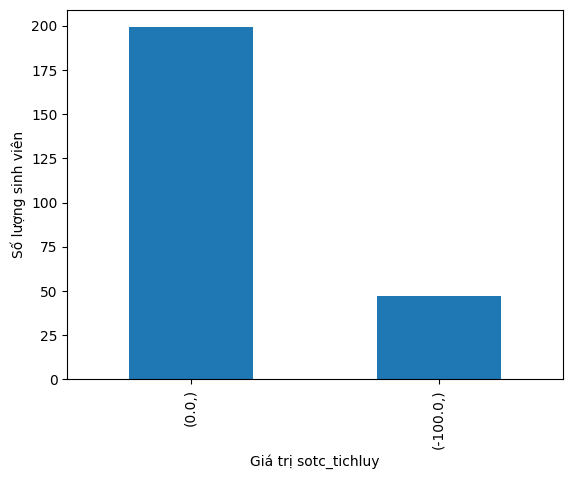

In [ ]:
#kiểm tra các giá trị sotc_tichluy <= 0
check = data[data['sotc_tichluy'] <= 0]
print(check.shape)
count= check[['sotc_tichluy']].value_counts()
print(count)
count.plot(kind='bar')
plt.xlabel('Giá trị sotc_tichluy')
plt.ylabel('Số lượng sinh viên')

# SINHVIEN + TOTNGHIEP + XULYHOCVU + THISINH + CHUNGCHI + DIEMRL + DTB_TOANKHOA + DIEM_THU
1. mssv
2. gioitinh
3. noisinh
4. dien_tt
5. lopsh
6. khoa
7. hedt
8. khoahoc
9. chuyennganh2
10. tinhtrang_hocvu
11. tinhtrang_chungchiav
12. dtb_diemrl
13. sotc_tichluy
14. Học kì 1
15. Học kì 2
16. Học kì 3'
17. Học kì 4
18. Học kì 5'
19. Học kì 6
20. Học kì 7
21. Học kì 8
22. Học kì 9
23. Học kì 10
24. Học kì 11
25. Học kì 12
26. Học kì 13
27. Học kì 14
14. class

In [ ]:
temp = pd.read_csv('/content/drive/MyDrive/Education dataset/diem_Thu.csv', encoding= 'utf-8')
temp.drop('mamh',  axis='columns', inplace=True)
temp.drop('malop',  axis='columns', inplace=True)
temp.drop('diem_qt',  axis='columns', inplace=True)
temp.drop('diem_th',  axis='columns', inplace=True)
temp.drop('diem_gk',  axis='columns', inplace=True)
temp.drop('diem_ck',  axis='columns', inplace=True)
temp.drop('tinhtrang',  axis='columns', inplace=True)
temp.drop('mamh_tt',  axis='columns', inplace=True)
v1=temp.loc[temp['trangthai'] == 1, 'diem_hp'].mean()
v2=temp.loc[temp['trangthai'] == 2, 'diem_hp'].mean()
v3=temp.loc[temp['trangthai'] == 3, 'diem_hp'].mean()
temp['diem_hp'] = np.where((temp['diem_hp'].isnull()) & (temp['trangthai']==1), v1, temp['diem_hp'])
temp['diem_hp'] = np.where((temp['diem_hp'].isnull()) & (temp['trangthai']==2), v2, temp['diem_hp'])
temp['diem_hp'] = np.where((temp['diem_hp'].isnull()) & (temp['trangthai']==3), v3, temp['diem_hp'])
indexsv0 = temp[ (temp['trangthai'] == 0)].index
indexsv4 = temp[ (temp['trangthai'] == 4)].index
indexsv5 = temp[ (temp['trangthai'] == 5)].index
temp.drop(indexsv5 , inplace=True)
temp.drop(indexsv0 , inplace=True)
temp.drop(indexsv4 , inplace=True)
temp["thoigian"]=temp["hocky"]*0.1+temp["namhoc"]
temp.drop('hocky',  axis='columns', inplace=True)
temp.drop('namhoc',  axis='columns',inplace=True)
grouped = temp.groupby(['mssv','thoigian'],as_index=False).aggregate({'sotc':'sum','diem_hp':'mean'})
grouped['hocki'] = grouped.groupby(['mssv']).cumcount()+1
n=grouped
kq = grouped[['mssv','thoigian','sotc']].copy()
grouped.drop('thoigian',  axis='columns', inplace=True)
grouped.drop('sotc',  axis='columns',inplace=True)
pivoted = grouped.pivot(index="mssv", columns="hocki", values="diem_hp").reset_index()
#pivoted.replace(to_replace=0,value=np.nan,inplace=True)
pivoted2=pivoted.dropna(axis=1,how='all')
pivoted2['diemtb']=pivoted2.mean(axis=1)
pivoted2.drop( 15,  axis='columns', inplace=True)
pivoted2.drop( 16,  axis='columns', inplace=True)
pivoted2.drop( 17,  axis='columns', inplace=True)
pivoted2.drop( 18,  axis='columns', inplace=True)
pivoted2.drop( 19,  axis='columns', inplace=True)
pivoted2.drop( 20,  axis='columns', inplace=True)
pivoted2.drop( 21,  axis='columns', inplace=True)
pivoted2.drop( 22,  axis='columns', inplace=True)
pivoted2.drop( 23,  axis='columns', inplace=True)
pivoted2.drop( 24,  axis='columns', inplace=True)
pivoted2.drop( 25,  axis='columns', inplace=True)
pivoted2.drop( 26, axis='columns',inplace=True)
pivoted2[14].fillna(-1, inplace=True)
pivoted2[13].fillna(-1, inplace=True)
pivoted2[12].fillna(-1, inplace=True)
pivoted2[11].fillna(-1, inplace=True)
pivoted2[10].fillna(-1, inplace=True)
pivoted2[9].fillna(-1, inplace=True)
pivoted2[8].fillna(-1, inplace=True)
pivoted2[7].fillna(-1, inplace=True)
pivoted2[6].fillna(-1, inplace=True)
pivoted2[5].fillna(-1, inplace=True)
pivoted2[4].fillna(-1, inplace=True)
pivoted2[3].fillna(-1, inplace=True)
pivoted2[2].fillna(-1, inplace=True)
pivoted2[1].fillna(-1, inplace=True)
print('check missing data: \n', pivoted2.isna().sum())
data = data.merge(pivoted2, how='left', on='mssv')[['mssv',' gioitinh',' noisinh','dien_tt',' lopsh', ' khoa', ' hedt',' khoahoc',' chuyennganh2','tinhtrang_hocvu', 'tinhtrang_chungchiav','dtb_diemrl','sotc_tichluy',1,2,3,4,5,6,7,8,9,10,11,12,13,14,'class']]
#print('check missing data: \n', data.isna().sum())
data.rename(columns = {1: 'Học kì 1'}, inplace = True)
data.rename(columns = {2: 'Học kì 2'}, inplace = True)
data.rename(columns = {3: 'Học kì 3'}, inplace = True)
data.rename(columns = {4: 'Học kì 4'}, inplace = True)
data.rename(columns = {5: 'Học kì 5'}, inplace = True)
data.rename(columns = {6: 'Học kì 6'}, inplace = True)
data.rename(columns = {7: 'Học kì 7'}, inplace = True)
data.rename(columns = {8: 'Học kì 8'}, inplace = True)
data.rename(columns = {9: 'Học kì 9'}, inplace = True)
data.rename(columns = {10: 'Học kì 10'}, inplace = True)
data.rename(columns = {11: 'Học kì 11'}, inplace = True)
data.rename(columns = {12: 'Học kì 12'}, inplace = True)
data.rename(columns = {13: 'Học kì 13'}, inplace = True)
data.rename(columns = {14: 'Học kì 14'}, inplace = True)
data

check missing data: 
 hocki
mssv      0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
diemtb    0
dtype: int64


,mssv,gioitinh,noisinh,dien_tt,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang_hocvu,...,Học kì 6,Học kì 7,Học kì 8,Học kì 9,Học kì 10,Học kì 11,Học kì 12,Học kì 13,Học kì 14,class
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,TP. Hồ Chí Minh,THPT,KTPM0001,CNPM,CQUI,8.0,D480103,0.0,...,6.760000,6.56,7.000,7.860000,-1.000000,-1.000000,-1.0,-1.0,-1.0,Khá
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1.0,Tỉnh Đồng Tháp,THPT,HTTT0001,HTTT,CTTT,8.0,D480104,8.0,...,8.000000,8.84,7.475,9.500000,8.033333,7.850000,9.2,7.4,-1.0,Khá
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,Tỉnh Hà Nam Ninh,THPT,KHMT2013,KHMT,CQUI,8.0,D480101,5.0,...,0.900000,3.34,1.420,7.008371,-1.000000,-1.000000,-1.0,-1.0,-1.0,NaN
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1.0,TP. Hồ Chí Minh,THPT,HTTT0001,HTTT,CTTT,8.0,D480104,0.0,...,8.000000,6.92,6.975,6.000000,7.500000,7.433333,0.0,7.7,6.7,Khá
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1.0,TP. Hồ Chí Minh,THPT,MMTT0001,MMT&TT,CQUI,8.0,D480201,8.0,...,8.050000,8.10,8.500,7.216667,6.950000,1.200000,4.7,0.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8290,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,1.0,Tỉnh An Giang,THPT,MMCL2019.2,MMT&TT,CLC,14.0,7480102,2.0,...,-1.000000,-1.00,-1.000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,NaN
8291,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,1.0,Tỉnh Bình Thuận,THPT,KHMT2019,KHMT,CQUI,14.0,D480101,0.0,...,8.033333,7.34,-1.000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,NaN
8292,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,1.0,Tỉnh Lâm Đồng,THPT,KHMT2019,KHMT,CQUI,14.0,D480101,0.0,...,7.200000,7.30,-1.000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,NaN
8293,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,1.0,Tỉnh Bến Tre,THPT,CNTT2019,KTTT,CQUI,14.0,D480201,0.0,...,7.800000,7.75,-1.000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,NaN


#Điều kiện gán nhãn KHÔNG TỐT NGHIỆP
1. tinhtrang_hocvu = 5
2. dtb_diemrl = nan hoặc dtb_diemrl < 50
3. sotc_tichluy <= 0

In [ ]:
#đồng bộ giá trị cột class
data['class'].replace([' Trung bình Khá',' TB Khá', ' TB khá', ' Trung bình khá'], 'Trung bình khá', inplace=True)
data['class'].replace([' Giỏi'], 'Giỏi', inplace=True)
data['class'].replace([' Xuất sắc'], 'Xuất sắc', inplace=True)
data['class'].replace([' Khá'], 'Khá', inplace=True)

#không tốt nghiệp do bị thôi học
data['class'] = data.apply(lambda row: 'Không tốt nghiệp' if (row['tinhtrang_hocvu'] == 5) else row['class'],axis=1)

#không tốt nghiệp do dtb_diemrl == nan hoặc dtb_diemrl < 50
data['dtb_diemrl'] = data['dtb_diemrl'].fillna(-1000)
data['class'] = data.apply(lambda row: 'Không tốt nghiệp' if (row['dtb_diemrl'] < 50) else row['class'],axis=1)

#Không tốt nghiệp do sotc_tichluy <= 0
data['class'] = data.apply(lambda row: 'Không tốt nghiệp' if (row['sotc_tichluy'] <= 0) else row['class'],axis=1)

data[data['class']=='Không tốt nghiệp']


,mssv,gioitinh,noisinh,dien_tt,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang_hocvu,...,Học kì 6,Học kì 7,Học kì 8,Học kì 9,Học kì 10,Học kì 11,Học kì 12,Học kì 13,Học kì 14,class
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,Tỉnh Hà Nam Ninh,THPT,KHMT2013,KHMT,CQUI,8.0,D480101,5.0,...,0.900000,3.340000,1.42,7.008371,-1.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp
16,931C7551XPvAibaEXe9ysTifnGoMwRbIrVzkrPrw,1.0,Tỉnh Vĩnh Long,THPT,ANTT2013,MMT&TT,CQUI,8.0,D480201,5.0,...,0.850000,3.340000,0.65,0.200000,0.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp
29,C57530A4XPvAibaEXe8hvnm4ihleLVTcBUD7ztLV,0.0,TP. Hồ Chí Minh,THPT,MMTT2013,MMT&TT,CQUI,8.0,D480102,5.0,...,6.800000,6.700000,2.50,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp
30,3E479342XPvAibaEXe+kwIr/VXjl01D1BeeuKZAN,1.0,Tỉnh Nam Định,THPT,KTPM0001,CNPM,CQUI,8.0,D480103,5.0,...,1.920000,2.000000,4.02,0.466667,0.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp
39,0CBE4487XPvAibaEXe+fmxcqgvribAaiAPDGKOrx,1.0,TP. Hồ Chí Minh,THPT,CTTT2013,HTTT,CTTT,8.0,D480104,5.0,...,5.000000,6.800000,7.55,8.000000,7.666667,0.466667,-1.0,-1.0,-1.0,Không tốt nghiệp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8288,344492BBXPvAibaEXe+KnWgScvZ27B5HVLUYfH4H,1.0,Tỉnh Quảng Bình,THPT,CTTT2019.1,HTTT,CTTT,14.0,D480104,0.0,...,8.583333,8.040000,7.92,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp
8289,02D9A220XPvAibaEXe+KnWgScvZ27LP2iqB5e3NW,1.0,Tỉnh Quảng Trị,THPT,KHCL2019.3,KHMT,CLC,14.0,D480101,2.0,...,5.400000,3.933333,-1.00,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp
8290,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,1.0,Tỉnh An Giang,THPT,MMCL2019.2,MMT&TT,CLC,14.0,7480102,2.0,...,-1.000000,-1.000000,-1.00,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp
8293,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,1.0,Tỉnh Bến Tre,THPT,CNTT2019,KTTT,CQUI,14.0,D480201,0.0,...,7.800000,7.750000,-1.00,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp


#Gán nhãn sinh viên đủ điều kiện tốt nghiệp

1.   Đủ 138 tín chỉ tích luỹ
2.   Đã có chứng chỉ anh văn
3.   Điểm rèn luyện >= 50



In [ ]:
data['class'] = data.apply(lambda row: 'tốt nghiệp' if ((row['sotc_tichluy'] >=138) and (row['tinhtrang_chungchiav'] == 1) and (row['dtb_diemrl'] >= 50) and (row['class']) is np.nan) else row['class'],axis=1)
data[data['class']=='tốt nghiệp']

,mssv,gioitinh,noisinh,dien_tt,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang_hocvu,...,Học kì 6,Học kì 7,Học kì 8,Học kì 9,Học kì 10,Học kì 11,Học kì 12,Học kì 13,Học kì 14,class
70,B1460568XPvAibaEXe/asAVnWDRS7f+aMPJ9kBjL,0.0,Tỉnh Ninh Thuận,THPT,KHMT0001,KHMT,CQUI,8.0,D480101,8.0,...,5.400000,7.520000,6.720000,7.380000,6.840000,-1.00,-1.0,-1.0,-1.0,tốt nghiệp
95,B2BC792FXPvAibaEXe+1P/4gNbgrefoTGueuT4Wa,1.0,Tỉnh Thanh Hóa,THPT,KTPM0001,CNPM,CQUI,8.0,D480103,0.0,...,6.825000,5.820000,7.125000,5.500000,5.766667,5.60,8.1,-1.0,-1.0,tốt nghiệp
1053,668A7C0EXPvAibaEXe/twRH8x8eygzacDsTzn1yF,1.0,TP. Hồ Chí Minh,THPT,KTMT0001,KTMT,CQUI,9.0,D520214,8.0,...,5.914286,6.033333,0.000000,6.816667,6.950000,5.98,-1.0,-1.0,-1.0,tốt nghiệp
1203,7ACF155CXPvAibaEXe/m6K07u0dn96OeUHTRay32,1.0,Tỉnh Đồng Tháp,THPT,HTTT0001,HTTT,CLC,9.0,D480104,0.0,...,7.183333,7.400000,7.133333,7.300000,9.000000,-1.00,-1.0,-1.0,-1.0,tốt nghiệp
1592,7075BE69XPvAibaEXe8WdGcsQTF3yHQhmzrDl1Yc,1.0,Tỉnh Tây Ninh,THPT,KTMT0001,KTMT,CQUI,9.0,D520214,0.0,...,8.025000,7.216667,8.020000,8.500000,-1.000000,-1.00,-1.0,-1.0,-1.0,tốt nghiệp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7942,DFF05B73XPvAibaEXe9t3AmSkf7FuZllpVb2cw7l,1.0,Tỉnh Khánh Hòa,THPT,KHCL2019.3,KHMT,CLC,14.0,D480101,0.0,...,7.766667,-1.000000,-1.000000,-1.000000,-1.000000,-1.00,-1.0,-1.0,-1.0,tốt nghiệp
7974,935D1AC7XPvAibaEXe94sdmGYWWl8NWfMuivPji8,1.0,Tỉnh Đồng Nai,THPT,PMCL2019.3,CNPM,CLC,14.0,D480103,0.0,...,8.383333,8.200000,8.425000,-1.000000,-1.000000,-1.00,-1.0,-1.0,-1.0,tốt nghiệp
8030,78A4BCD2XPvAibaEXe/+5dmtHXoxmpSuEW57nevC,1.0,Tỉnh Kiên Giang,THPT,ATCL2019.2,MMT&TT,CLC,14.0,D480299,0.0,...,8.250000,8.080000,8.400000,-1.000000,-1.000000,-1.00,-1.0,-1.0,-1.0,tốt nghiệp
8059,B1B996D1XPvAibaEXe/VQHzzHDYACRfsgbqiwflU,0.0,TP. Hồ Chí Minh,THPT,HTCL2019.2,HTTT,CLC,14.0,D480104,0.0,...,7.733333,8.042857,-1.000000,-1.000000,-1.000000,-1.00,-1.0,-1.0,-1.0,tốt nghiệp


#HOÀN THÀNH BẢNG DỮ LIỆU
1. Đồng bộ hoá class (tốt nghiệp/ Không tốt nghiệp)
2. Xoá các cột và hàng không cần thiết
3. Số hoá các cột dữ liệu

In [ ]:
data['class'] = data.apply(lambda row: 'NaN' if (row['class'] is np.nan) else row['class'],axis=1)
data = data[data['class'] != 'NaN']
data=data.fillna(0)
data['class'] = data.apply(lambda row: 'tốt nghiệp'if (row['class'] != 'Không tốt nghiệp') else row['class'],axis=1)
data

,mssv,gioitinh,noisinh,dien_tt,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang_hocvu,...,Học kì 6,Học kì 7,Học kì 8,Học kì 9,Học kì 10,Học kì 11,Học kì 12,Học kì 13,Học kì 14,class
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,TP. Hồ Chí Minh,THPT,KTPM0001,CNPM,CQUI,8.0,D480103,0.0,...,6.760000,6.560000,7.000,7.860000,-1.000000,-1.000000,-1.0,-1.0,-1.0,tốt nghiệp
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1.0,Tỉnh Đồng Tháp,THPT,HTTT0001,HTTT,CTTT,8.0,D480104,8.0,...,8.000000,8.840000,7.475,9.500000,8.033333,7.850000,9.2,7.4,-1.0,tốt nghiệp
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1.0,Tỉnh Hà Nam Ninh,THPT,KHMT2013,KHMT,CQUI,8.0,D480101,5.0,...,0.900000,3.340000,1.420,7.008371,-1.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1.0,TP. Hồ Chí Minh,THPT,HTTT0001,HTTT,CTTT,8.0,D480104,0.0,...,8.000000,6.920000,6.975,6.000000,7.500000,7.433333,0.0,7.7,6.7,tốt nghiệp
5,4D1054A2XPvAibaEXe8WD3qnVG2b/aV/yYzs56/D,0.0,Tỉnh Hà Tĩnh,THPT,KTPM0001,CNPM,CQUI,8.0,D480103,0.0,...,7.950000,7.960000,8.620,6.666667,-1.000000,-1.000000,-1.0,-1.0,-1.0,tốt nghiệp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8288,344492BBXPvAibaEXe+KnWgScvZ27B5HVLUYfH4H,1.0,Tỉnh Quảng Bình,THPT,CTTT2019.1,HTTT,CTTT,14.0,D480104,0.0,...,8.583333,8.040000,7.920,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp
8289,02D9A220XPvAibaEXe+KnWgScvZ27LP2iqB5e3NW,1.0,Tỉnh Quảng Trị,THPT,KHCL2019.3,KHMT,CLC,14.0,D480101,2.0,...,5.400000,3.933333,-1.000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp
8290,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,1.0,Tỉnh An Giang,THPT,MMCL2019.2,MMT&TT,CLC,14.0,7480102,2.0,...,-1.000000,-1.000000,-1.000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp
8293,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,1.0,Tỉnh Bến Tre,THPT,CNTT2019,KTTT,CQUI,14.0,D480201,0.0,...,7.800000,7.750000,-1.000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp


class           
tốt nghiệp          2190
Không tốt nghiệp    1179
dtype: int64


Text(0, 0.5, 'Số lượng sinh viên')

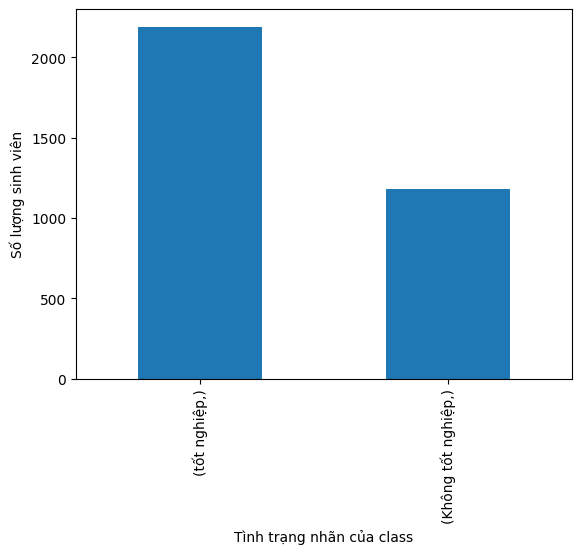

In [ ]:
count= data[['class']].value_counts()
print(count)
count.plot(kind='bar')
plt.xlabel('Tình trạng nhãn của class')
plt.ylabel('Số lượng sinh viên')

In [ ]:
print('check missing data: \n', data.isna().sum())

check missing data: 
 mssv                    0
 gioitinh               0
 noisinh                0
dien_tt                 0
 lopsh                  0
 khoa                   0
 hedt                   0
 khoahoc                0
 chuyennganh2           0
tinhtrang_hocvu         0
tinhtrang_chungchiav    0
dtb_diemrl              0
sotc_tichluy            0
Học kì 1                0
Học kì 2                0
Học kì 3                0
Học kì 4                0
Học kì 5                0
Học kì 6                0
Học kì 7                0
Học kì 8                0
Học kì 9                0
Học kì 10               0
Học kì 11               0
Học kì 12               0
Học kì 13               0
Học kì 14               0
class                   0
dtype: int64


In [ ]:
data.drop('mssv',  axis='columns', inplace=True)
data

,gioitinh,noisinh,dien_tt,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang_hocvu,tinhtrang_chungchiav,...,Học kì 6,Học kì 7,Học kì 8,Học kì 9,Học kì 10,Học kì 11,Học kì 12,Học kì 13,Học kì 14,class
0,1.0,TP. Hồ Chí Minh,THPT,KTPM0001,CNPM,CQUI,8.0,D480103,0.0,1,...,6.760000,6.560000,7.000,7.860000,-1.000000,-1.000000,-1.0,-1.0,-1.0,tốt nghiệp
1,1.0,Tỉnh Đồng Tháp,THPT,HTTT0001,HTTT,CTTT,8.0,D480104,8.0,1,...,8.000000,8.840000,7.475,9.500000,8.033333,7.850000,9.2,7.4,-1.0,tốt nghiệp
2,1.0,Tỉnh Hà Nam Ninh,THPT,KHMT2013,KHMT,CQUI,8.0,D480101,5.0,0,...,0.900000,3.340000,1.420,7.008371,-1.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp
3,1.0,TP. Hồ Chí Minh,THPT,HTTT0001,HTTT,CTTT,8.0,D480104,0.0,1,...,8.000000,6.920000,6.975,6.000000,7.500000,7.433333,0.0,7.7,6.7,tốt nghiệp
5,0.0,Tỉnh Hà Tĩnh,THPT,KTPM0001,CNPM,CQUI,8.0,D480103,0.0,1,...,7.950000,7.960000,8.620,6.666667,-1.000000,-1.000000,-1.0,-1.0,-1.0,tốt nghiệp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8288,1.0,Tỉnh Quảng Bình,THPT,CTTT2019.1,HTTT,CTTT,14.0,D480104,0.0,0,...,8.583333,8.040000,7.920,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp
8289,1.0,Tỉnh Quảng Trị,THPT,KHCL2019.3,KHMT,CLC,14.0,D480101,2.0,0,...,5.400000,3.933333,-1.000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp
8290,1.0,Tỉnh An Giang,THPT,MMCL2019.2,MMT&TT,CLC,14.0,7480102,2.0,0,...,-1.000000,-1.000000,-1.000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp
8293,1.0,Tỉnh Bến Tre,THPT,CNTT2019,KTTT,CQUI,14.0,D480201,0.0,0,...,7.800000,7.750000,-1.000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,Không tốt nghiệp


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data[' noisinh']= label_encoder.fit_transform(data[' noisinh'])
data['dien_tt']= label_encoder.fit_transform(data['dien_tt'])
data[' lopsh']= label_encoder.fit_transform(data[' lopsh'])
data[' khoa']= label_encoder.fit_transform(data[' khoa'])
data[' hedt']= label_encoder.fit_transform(data[' hedt'])
data[' chuyennganh2']= label_encoder.fit_transform(data[' chuyennganh2'])
data['class']= label_encoder.fit_transform(data['class'])
data

,gioitinh,noisinh,dien_tt,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang_hocvu,tinhtrang_chungchiav,...,Học kì 6,Học kì 7,Học kì 8,Học kì 9,Học kì 10,Học kì 11,Học kì 12,Học kì 13,Học kì 14,class
0,1.0,7,2,88,0,2,8.0,4,0.0,1,...,6.760000,6.560000,7.000,7.860000,-1.000000,-1.000000,-1.0,-1.0,-1.0,1
1,1.0,60,2,47,1,3,8.0,5,8.0,1,...,8.000000,8.840000,7.475,9.500000,8.033333,7.850000,9.2,7.4,-1.0,1
2,1.0,21,2,66,2,2,8.0,2,5.0,0,...,0.900000,3.340000,1.420,7.008371,-1.000000,-1.000000,-1.0,-1.0,-1.0,0
3,1.0,7,2,47,1,3,8.0,5,0.0,1,...,8.000000,6.920000,6.975,6.000000,7.500000,7.433333,0.0,7.7,6.7,1
5,0.0,23,2,88,0,2,8.0,4,0.0,1,...,7.950000,7.960000,8.620,6.666667,-1.000000,-1.000000,-1.0,-1.0,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8288,1.0,41,2,35,1,3,14.0,5,0.0,0,...,8.583333,8.040000,7.920,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,0
8289,1.0,44,2,62,2,0,14.0,2,2.0,0,...,5.400000,3.933333,-1.000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,0
8290,1.0,9,2,100,5,0,14.0,10,2.0,0,...,-1.000000,-1.000000,-1.000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,0
8293,1.0,18,2,28,4,2,14.0,6,0.0,0,...,7.800000,7.750000,-1.000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,0


#DATA VISUALIZATION

<Axes: >

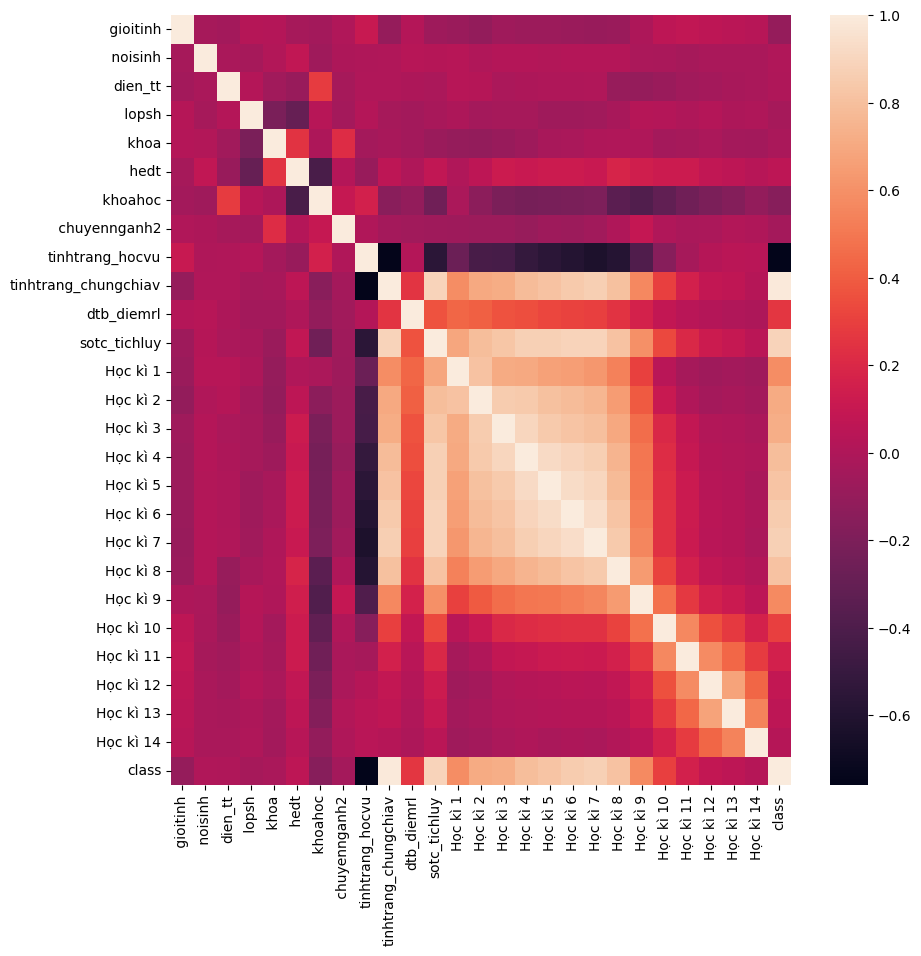

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

#TRAIN TEST

In [ ]:
data_train = data[data[' khoahoc'] != 14]
data_test = data[data[' khoahoc'] == 14]

X_train = data_train.drop('class',axis=1)
y_train = data_train['class']

X_test = data_test.drop('class',axis=1)
y_test = data_test['class']
X_train.shape,X_test.shape

((3244, 26), (125, 26))

#NAVIE BAYES

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        61

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

_______________________________________________


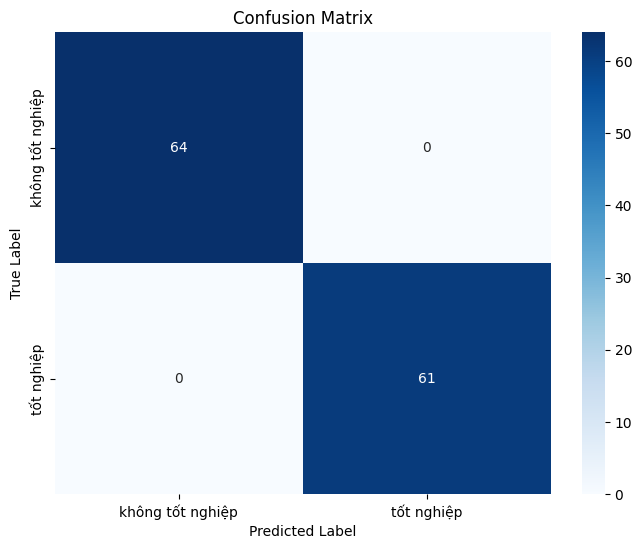

In [ ]:
gaussNb=GaussianNB()
gaussNb.fit(X_train,y_train)
y_predict=gaussNb.predict(X_test)

print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, y_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_predict)}")
print("_______________________________________________")

cm = confusion_matrix(y_test, y_predict)

# Create labels for the confusion matrix
labels = ['không tốt nghiệp', 'tốt nghiệp']

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

#SVM

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        61

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

_______________________________________________


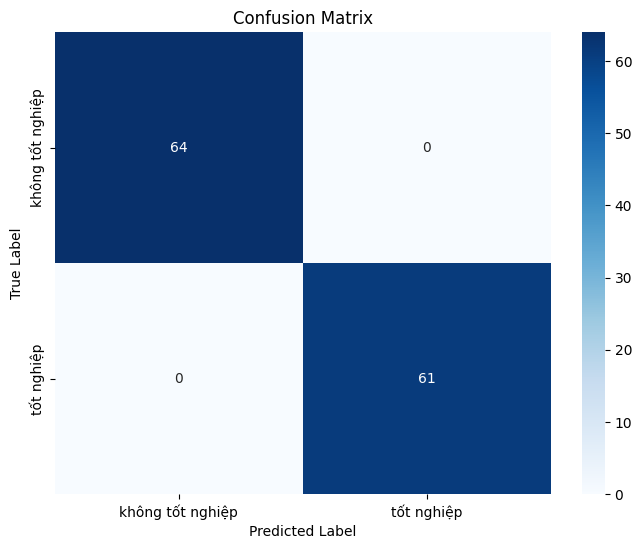

In [ ]:
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred = svm.predict(X_test)

print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_pred)}")
print("_______________________________________________")

cm = confusion_matrix(y_test, y_pred)

# Create labels for the confusion matrix
labels = ['không tốt nghiệp', 'tốt nghiệp']

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

#RANDOM FOREST

Train Result:
Accuracy Score: 100.00%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        61

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



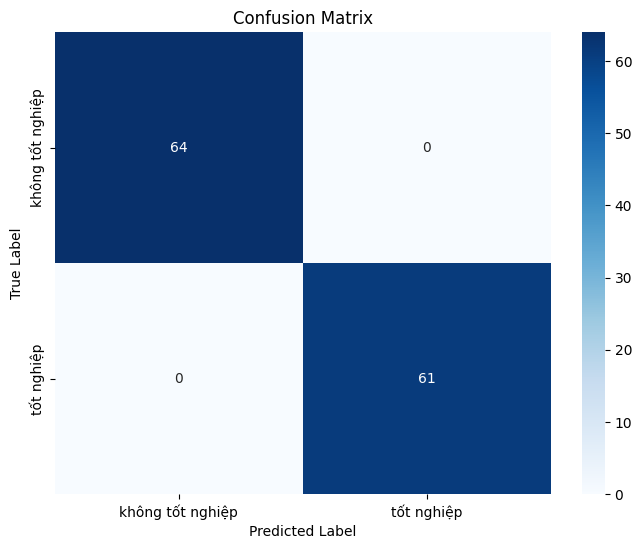

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, y_predict) * 100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_predict)}")


# Create labels for the confusion matrix
labels = ['không tốt nghiệp', 'tốt nghiệp']

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

#DECISION TREE


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        61

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

_______________________________________________


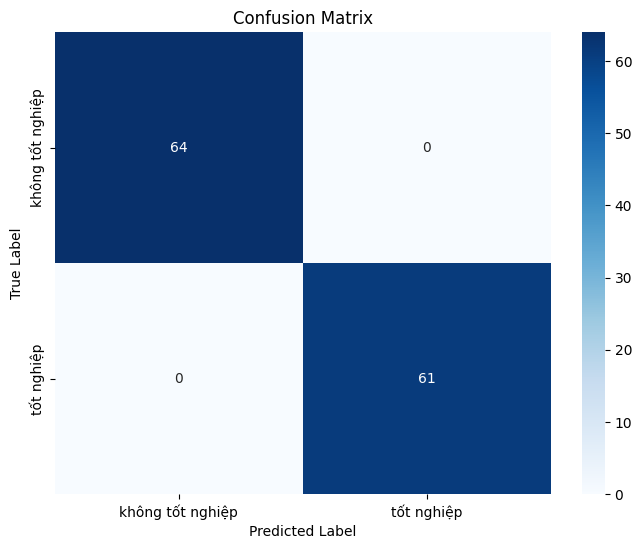

In [ ]:
# Khởi tạo mô hình Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
clf.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra
y_pred = clf.predict(X_test)

# Tính độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_pred)}")
print("_______________________________________________")
cm = confusion_matrix(y_test, y_pred)

# Create labels for the confusion matrix
labels = ['không tốt nghiệp', 'tốt nghiệp']

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
data1 = data
data1.fillna(-1,inplace=True)
data1['Học kì 1']=-1
data1['Học kì 2']=-1
data1['Học kì 3']=-1
data1['Học kì 4']=-1
data1['Học kì 5']=-1
data1['Học kì 6']=-1
data1['Học kì 7']=-1
data1['Học kì 8']=-1
data1['Học kì 9']=-1
data1['Học kì 10']=-1
data1['Học kì 11']=-1
data1['Học kì 12']=-1
data1['Học kì 13']=-1
data1['Học kì 14']=-1
data1['tinhtrang_hocvu']=-1
data1['tinhtrang_chungchiav']=-1
data1['dtb_diemrl']=-1
data1['sotc_tichluy']=-1
data1

,gioitinh,noisinh,dien_tt,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang_hocvu,tinhtrang_chungchiav,...,Học kì 6,Học kì 7,Học kì 8,Học kì 9,Học kì 10,Học kì 11,Học kì 12,Học kì 13,Học kì 14,class
0,1.0,7,2,88,0,2,8.0,4,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
1,1.0,60,2,47,1,3,8.0,5,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,1.0,21,2,66,2,2,8.0,2,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
3,1.0,7,2,47,1,3,8.0,5,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
5,0.0,23,2,88,0,2,8.0,4,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8288,1.0,41,2,35,1,3,14.0,5,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
8289,1.0,44,2,62,2,0,14.0,2,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
8290,1.0,9,2,100,5,0,14.0,10,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
8293,1.0,18,2,28,4,2,14.0,6,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0


In [ ]:
data

,gioitinh,noisinh,dien_tt,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang_hocvu,tinhtrang_chungchiav,...,Học kì 6,Học kì 7,Học kì 8,Học kì 9,Học kì 10,Học kì 11,Học kì 12,Học kì 13,Học kì 14,class
0,1.0,7,2,88,0,2,8.0,4,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
1,1.0,60,2,47,1,3,8.0,5,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,1.0,21,2,66,2,2,8.0,2,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
3,1.0,7,2,47,1,3,8.0,5,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
5,0.0,23,2,88,0,2,8.0,4,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8288,1.0,41,2,35,1,3,14.0,5,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
8289,1.0,44,2,62,2,0,14.0,2,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
8290,1.0,9,2,100,5,0,14.0,10,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
8293,1.0,18,2,28,4,2,14.0,6,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0


In [ ]:
data_train = data[data[' khoahoc'] != 8]
data_test = data1[data1[' khoahoc'] == 8]

X_train = data_train.drop('class',axis=1)
y_train = data_train['class']

X_test = data_test.drop('class',axis=1)
y_test = data_test['class']
X_train.shape,X_test.shape

((2608, 26), (761, 26))

Train Result:
Accuracy Score: 72.80%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       199
           1       0.74      0.99      0.84       562

    accuracy                           0.73       761
   macro avg       0.37      0.49      0.42       761
weighted avg       0.54      0.73      0.62       761

_______________________________________________


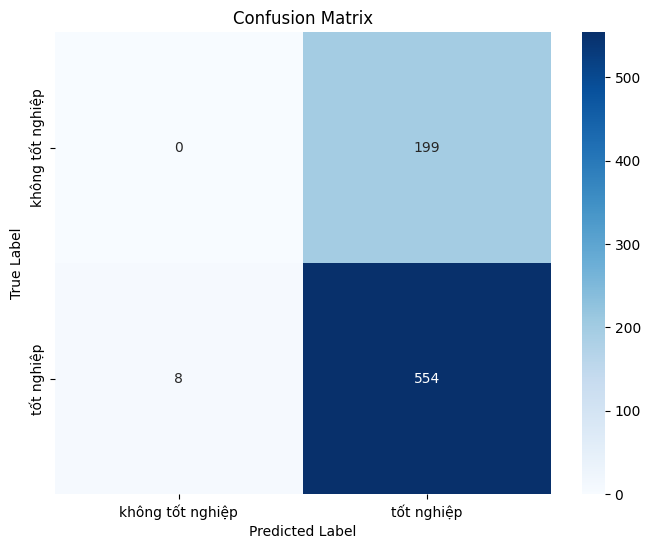

In [ ]:
gaussNb.fit(X_train,y_train)
y_predict=gaussNb.predict(X_test)

print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, y_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_predict)}")
print("_______________________________________________")

cm = confusion_matrix(y_test, y_predict)

# Create labels for the confusion matrix
labels = ['không tốt nghiệp', 'tốt nghiệp']

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()